In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u

import peakutils as pu
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

In [9]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
filename2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/energyNotrace/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()
coll_tot=ca.NPYreader(filename2,False).get_event()

print(len(coll_tot.get_energies()))

1381009


In [3]:
coll1=coll.subset('ae',0,1.6e-2)
#coll1=coll.subset('ener51563gy',2102,2106)
curr1=coll1.get_curr()
trace1=coll1.get_traces()
energy1=coll1.get_energies()
coll2=coll.subset('ae',1.90e-2,1.95e-2)
curr2=coll2.get_curr()
energy2=coll2.get_energies()

<IPython.core.display.Javascript object>


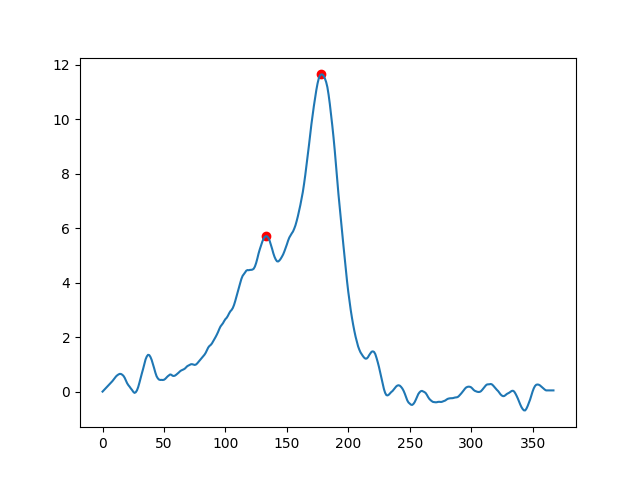

n peaks computed 2


<IPython.core.display.Javascript object>


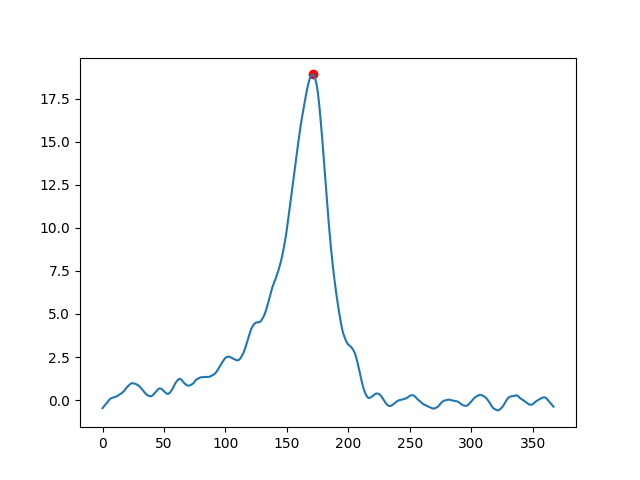

n peaks computed 1


In [4]:
from scipy.signal import find_peaks
#MSE
plt.figure()
i=23
plt.plot(curr1[i])

E=750
maxlim=7

#reproducing what the peak finder does
indexes=u.n_peaks().compute_n_peaks(curr1[i],energy1[i],E,maxlim)
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,curr1[i][indexes],marker='o',color='r')

#SSE
plt.figure()
plt.plot(curr2[i])
indexes=u.n_peaks().compute_n_peaks(curr2[i],energy2[i],E,maxlim)
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,curr2[i][indexes],marker='o',color='r')

203582


<IPython.core.display.Javascript object>


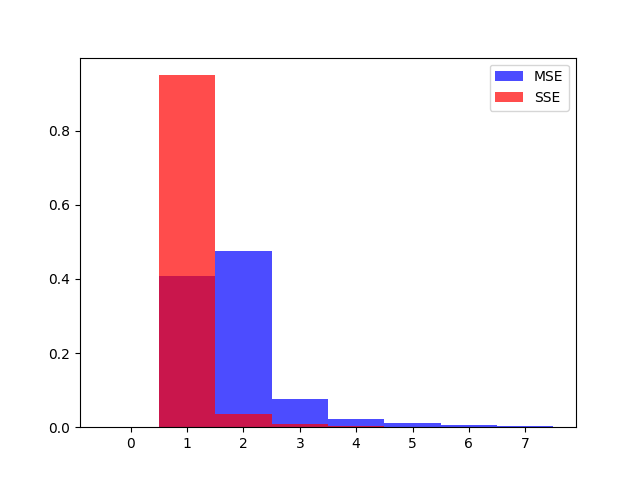

<IPython.core.display.Javascript object>


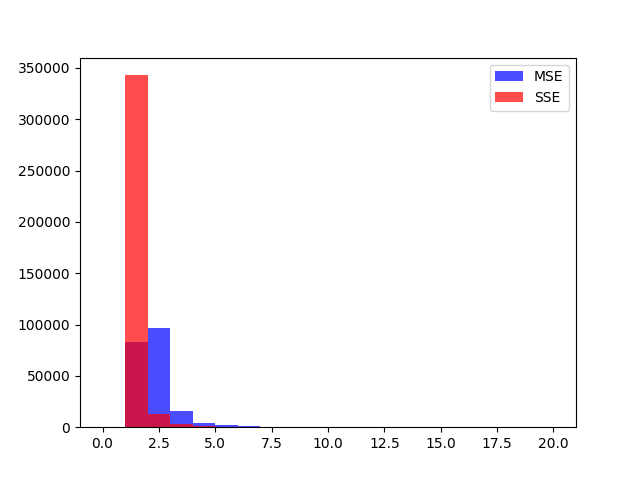

In [12]:
#Distribution of the events
n1=coll_tot.subset('ae',0,1.6e-2).get_n_peaks()
print(n1.size)
n2=coll_tot.subset('ae',1.90e-2,1.95e-2).get_n_peaks()
plt.figure()
bins=range(9)
plt.hist(n1,color='b',alpha=0.7,bins=bins,density=True,label='MSE',align='left')
plt.hist(n2,color='r',alpha=0.7,bins=bins,density=True,label='SSE',align='left')
plt.xticks(range(8))
plt.legend()

#without normalization

n1=coll_tot.subset('ae',0,1.6e-2).get_n_peaks()
n2=coll_tot.subset('ae',1.90e-2,1.95e-2).get_n_peaks()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,label='MSE')
plt.hist(n2,color='r',alpha=0.7,bins=bins,label='SSE')
plt.legend()

<IPython.core.display.Javascript object>


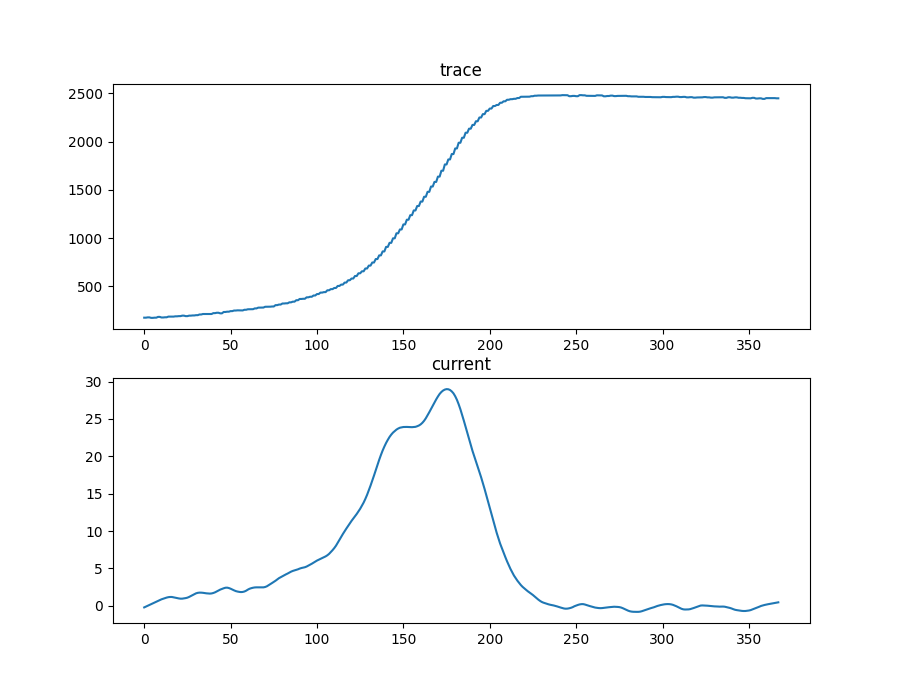

<IPython.core.display.Javascript object>


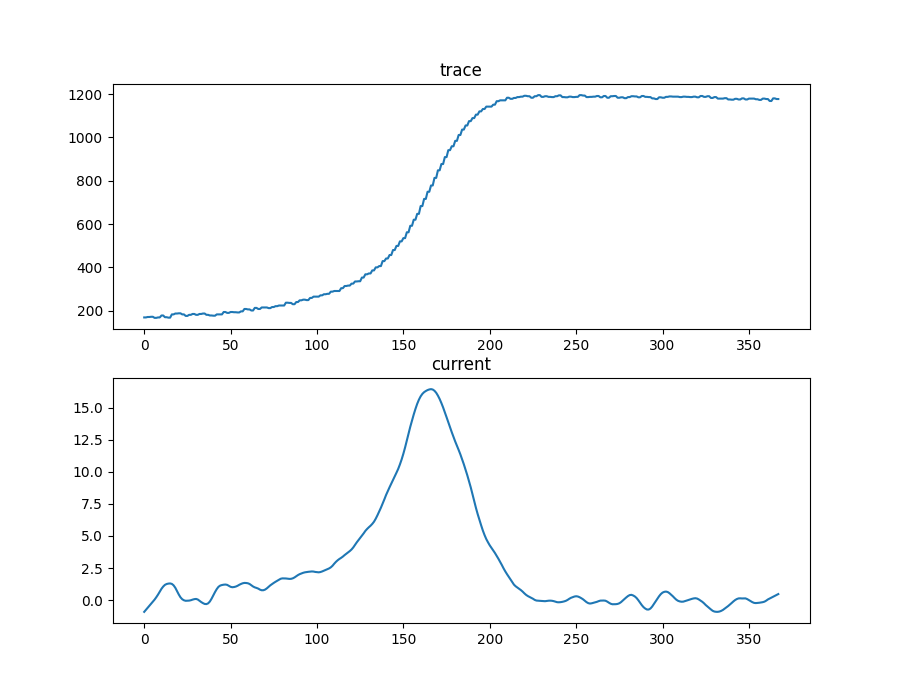

<IPython.core.display.Javascript object>


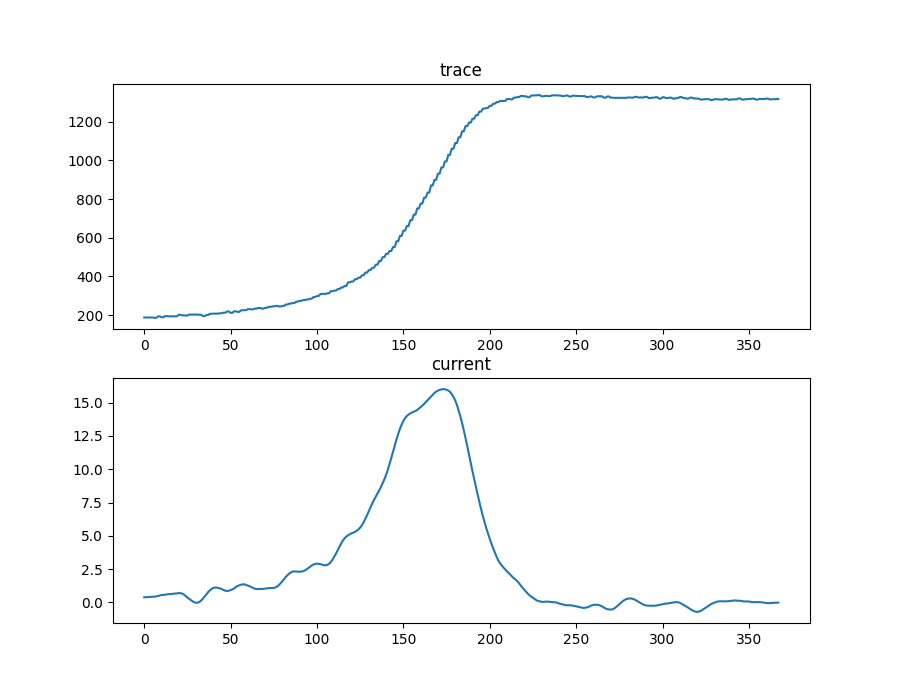

<IPython.core.display.Javascript object>


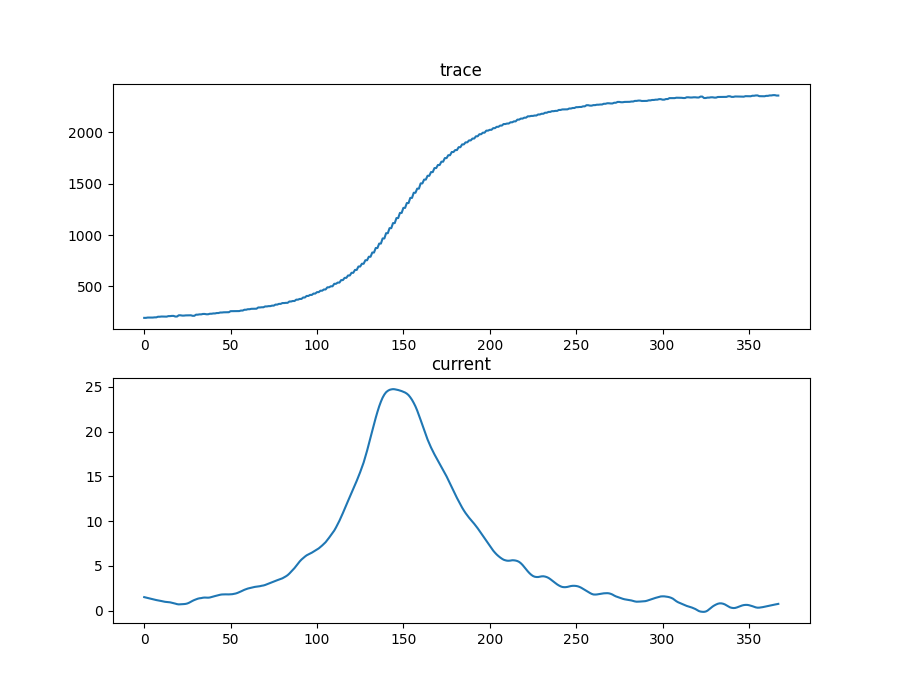

<IPython.core.display.Javascript object>


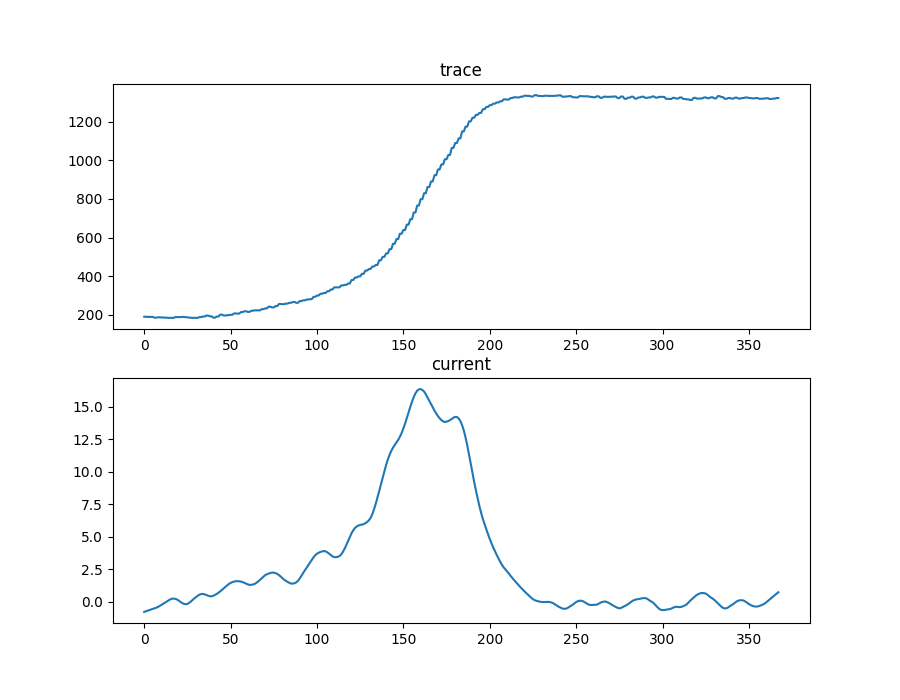

<IPython.core.display.Javascript object>


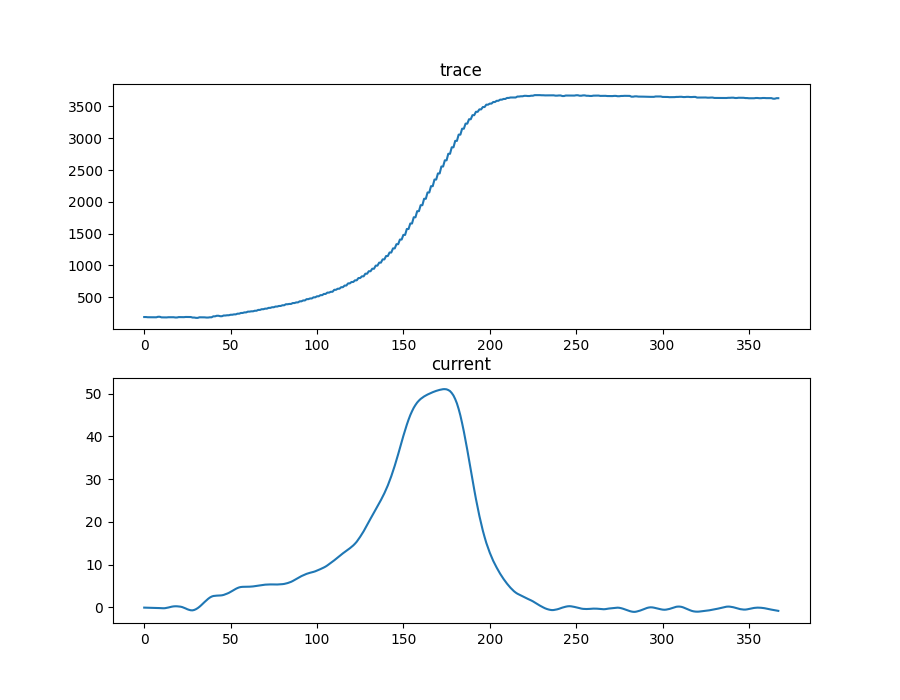

<IPython.core.display.Javascript object>


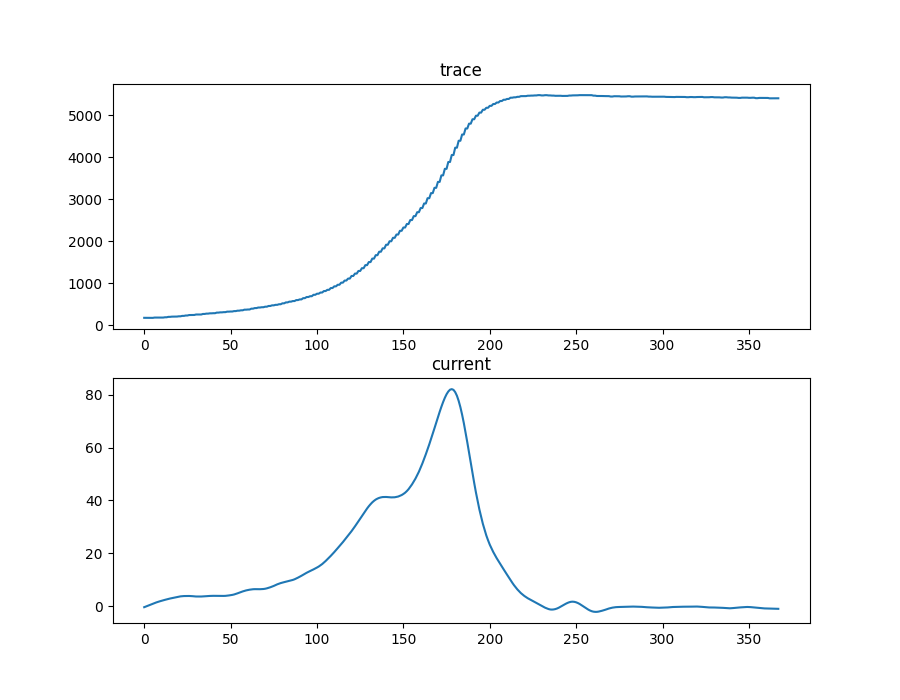

<IPython.core.display.Javascript object>


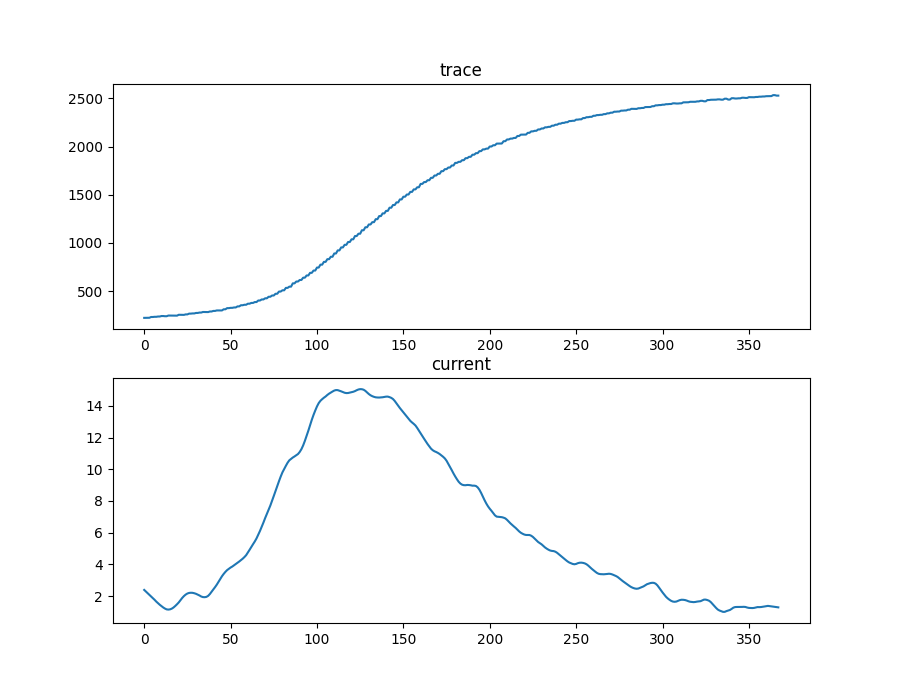

<IPython.core.display.Javascript object>


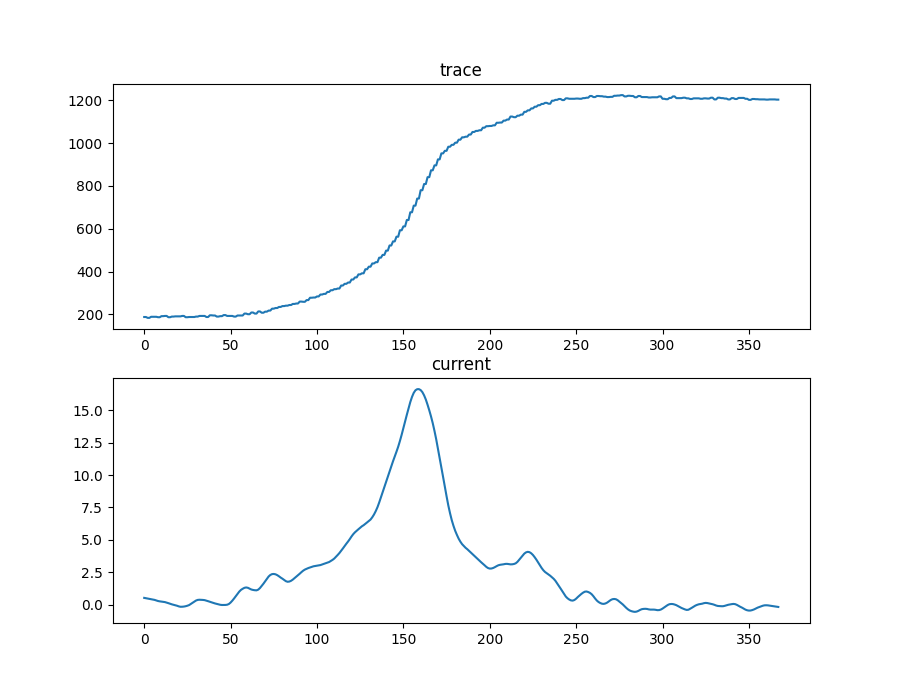

<IPython.core.display.Javascript object>


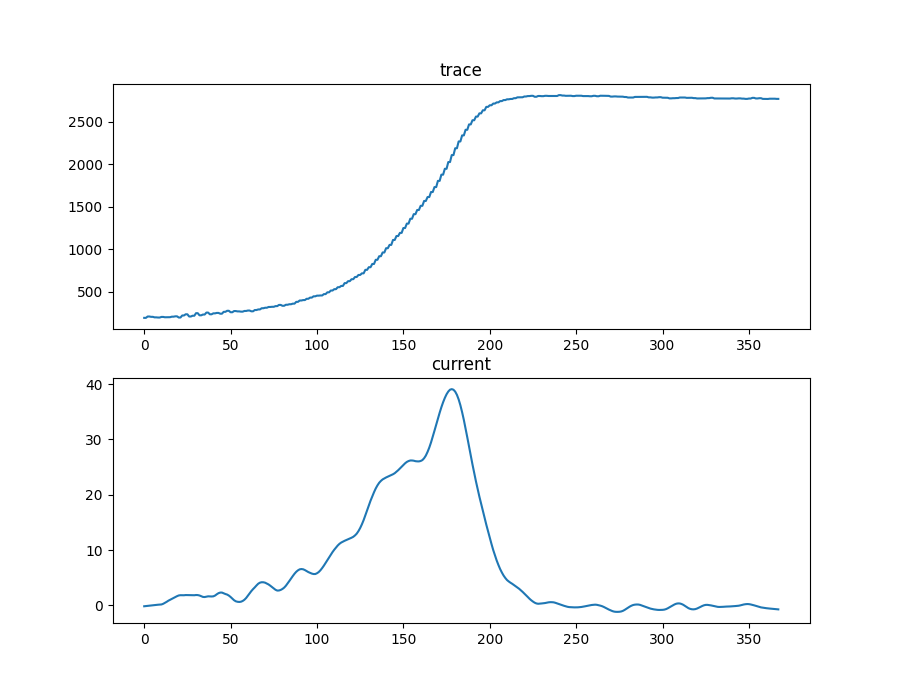

In [11]:
#Check where is 

c=coll1.subset('n_peaks',cutmin=0,cutmax=1)
trace=c.get_traces()
curr=c.get_curr()
k=0
for i in curr:
    if k>9:break
    fig,axs=plt.subplots(2,figsize=(9,7))
    axs[0].plot(trace[k])
    axs[0].set_title('trace')
    axs[1].plot(i)
    axs[1].set_title('current')
    k+=1

<IPython.core.display.Javascript object>


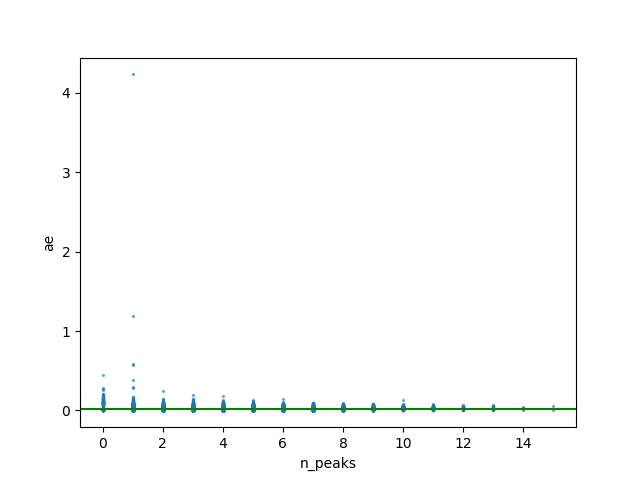

number of events with number of peaks >3: 0.046877397015099825


In [13]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_n_peaks(),coll_tot.get_avse(),s=2,alpha=0.5)
plt.show()

plt.axhline(1.6e-2, color='g')
plt.xlabel('n_peaks')
plt.ylabel('ae')

plt.annotate('cut_ae',(21,1.8e-2))

print('number of events with number of peaks >3: '+str(len(coll.subset('n_peaks',cutmin=4).get_energies())/len(coll.get_energies())))

In [22]:
#Prominence analysis

#p1='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/1.5/Std-232Th-3Bq-AEcalibration-im010421.npy'
#p2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/0.5/Std-232Th-3Bq-AEcalibration-im010421.npy'
#p3='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/0.6/Std-232Th-3Bq-AEcalibration-im010421.npy'
#p4='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/0.4/Std-232Th-3Bq-AEcalibration-im010421.npy'

#p5='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/1.6/Std-232Th-3Bq-AEcalibration-im010421.npy'
#p6='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/1.7/Std-232Th-3Bq-AEcalibration-im010421.npy'
p7='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/1.5Height0.25/Std-232Th-3Bq-AEcalibration-im010421.npy'
#p8='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/1.6Height0.25/Std-232Th-3Bq-AEcalibration-im010421.npy'
p9='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/0.5Height0.25/Std-232Th-3Bq-AEcalibration-im010421.npy'

#p1=ca.NPYreader(p1,True).get_event().subset('energy',cutmin=0,cutmax=200)
#p2=ca.NPYreader(p2,True).get_event().subset('energy',cutmin=750)
#p3=ca.NPYreader(p3,True).get_event().subset('energy',cutmin=750)
#p4=ca.NPYreader(p4,True).get_event().subset('energy',cutmin=750)
#p5=ca.NPYreader(p5,True).get_event().subset('energy',cutmin=0,cutmax=200)
#p6=ca.NPYreader(p6,True).get_event().subset('energy',cutmin=0,cutmax=200)
p7=ca.NPYreader(p7,True).get_event().subset('energy',cutmin=0,cutmax=200)
#p8=ca.NPYreader(p8,True).get_event().subset('energy',cutmin=0,cutmax=200)
p9=ca.NPYreader(p9,True).get_event().subset('energy',cutmin=0,cutmax=200)


#peaks1=p1.get_n_peaks()
#peaks2=p2.get_n_peaks()
#peaks3=p3.get_n_peaks()
#peaks4=p4.get_n_peaks()
#peaks5=p5.get_n_peaks()
#peaks6=p6.get_n_peaks()
peaks7=p7.get_n_peaks()
#peaks8=p8.get_n_peaks()
peaks9=p9.get_n_peaks()

l=np.where((peaks7-peaks9) != 0)[0]
print(len(l))

print('percentage: '+str(len(l)/p7.get_energies().size))

24470
percentage: 0.33519629599189066


0.022777578914302828


<IPython.core.display.Javascript object>


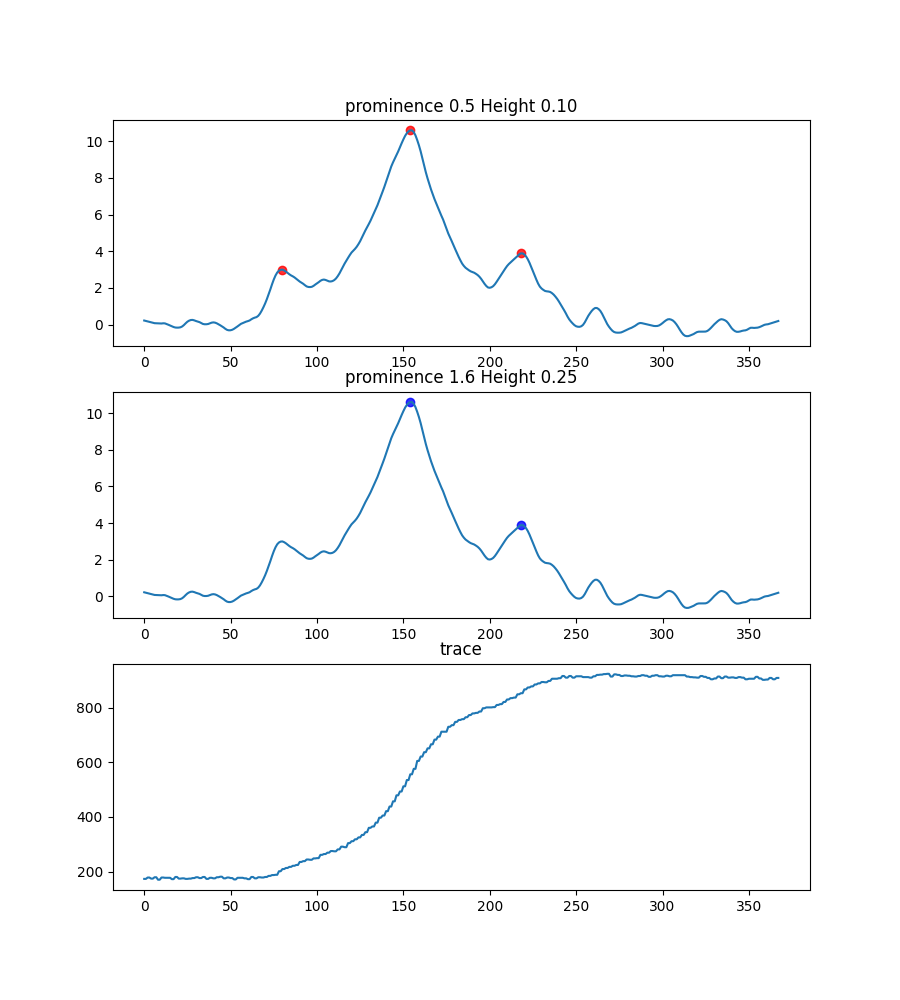

Text(0.5, 1.0, 'trace')

In [67]:
l2=[]
p=p7.subset('n_peaks',index=l)
curr=p.get_curr()
for i in range(0,len(curr)):
    if ((max(curr[i])>=7)&(max(curr[i])<=1000)):
        l2.append(i)
        
print(len(l2)/len(ca.NPYreader('/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/0.5Height0.25/Std-232Th-3Bq-AEcalibration-im010421.npy',True).get_event().get_energies()))
p=(p.subset('n_peaks',index=l2)).subset('ae',cutmin=0,cutmax=1.6e-2)
curr=p.get_curr()
trace=p.get_traces()

k=3
fig,axs=plt.subplots(3,figsize=(9,10))
axs[0].plot(curr[k])
axs[0].set_title('prominence 0.5 Height 0.10')
ind=find_peaks(curr[k],prominence=0.5,height=0.25*max(curr[k]),distance=10)[0]
axs[0].scatter(ind,curr[k][ind],color='r',alpha=0.8)

axs[1].plot(curr[k])
axs[1].set_title('prominence 1.6 Height 0.25')
ind=find_peaks(curr[k],height=0.25*max(curr[k]),prominence=1.6,distance=10)[0]
axs[1].scatter(ind,curr[k][ind],color='b',alpha=0.8)

axs[2].plot(trace[k])
axs[2].set_title('trace')